# Photomontage
*By Shkalikov Oleh, FI-81*

In [1]:
from functools import partial

import matplotlib
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

from cv.photomontage import merge, g, q

matplotlib.rcParams['figure.figsize'] = (10, 10)


Наша задача полягає у тому, щоб об'єднати зображення, зняті з одного ракурсу, ґрунтуючись на масках, які позначають ті пікселі, яки ми бажаємо залишити на нашому вихідному зображенні. Ми зведемо її до задачі динамічного програмування на ланцюгах, тож спочатку опишемо її математично.

Нехай у нас є нас є множина пікселів зображення(розміром $H \times W$) $P$ та відношення сусідства $\tau$ ("по рядкам"). Вони задаються наступним чином:
$$
    P = \{ 1, \dots, H \} \times \{ 1, \dots, W \} \\
    \tau = \{ \left\langle (i, j), (i, j+1) \right\rangle | i \in \{ 1, \dots, H \}, j \in \{ 1, \dots, W-1 \} \}
$$

Також маємо скінченну множину міток зображень $K = \{1, \dots, n\}$. Відповідно $k \in K$-те зображенням $x^k$ буде деякий ін'єктивним відображенням пікселів на множину кольорів $C$(у нашому випадку $\mathbb{Z} \cap [0, 255]$), а маска $b^k$ на бінарну множину.
$$
    x^k: P \rightarrow C \\
    b^k: P \rightarrow \{ 0 , 1\}
$$

Відповідно функціями "ваги" у нашій задачі ми оберемо наступні($p, p' \in P$, $k \in K$):
$$
q_p(k) = \alpha (1 - b^k_p), \;\;  \alpha \in \mathbb{R_+} \{0, +\infty \}
$$
$$
    g_{pp'}(k, k') = \beta \left( \Vert x_p^k - x_p^{k'} \Vert + \Vert x_{p'}^k - x_{p'}^{k'} \Vert \right),
    \;\; \beta \in \mathbb{R_+} \{0, +\infty\}
$$
Тут параметр $\alpha$ відповідає за те, наскільки нам "важливо" залишити у вихідному зображенні ті пікселі, які були позначені на відповідній масці, а параметр $\beta$ за те, як сильно ми будемо "штрафувати" за те, що пари сусідніх пікселів різних зображень відрізняються.

І наша задача остаточно полягає у тому, щоб знайти таке $k^*: P \rightarrow K$, що:
$$ 
    k^{*} \in \arg \min\limits_{k: P \rightarrow K} \left( \sum\limits_{p \in P} q_p(k_p) + 
    \sum\limits_{pp' \in \tau} g_{pp'}(k_p, k_{p'}) \right)
$$

Отже ми звели нашу задачу до задачі динамічного програмування на ланцюгах, яку будемо розв'язувати дослідженим на лекції методом(застосовуючи кешування проміжних результатів).женим на лекції методом(застосовуючи кешування проміжних результатів).

Завантажимо зображення та маски й сконкатенуємо їх у відповідні масиви

In [2]:
images = np.stack([np.asarray(Image.open(f'./data/image_0{i}.png')) for i in range(1, 6)])
masks =  np.stack([np.asarray(Image.open(f'./data/mask_0{i}.png').convert('L'), dtype=bool) for i in range(1, 6)])

Запустимо алгоритм. Шляхом пошуку по сітці параметрами за замовчуванням було обрано наступні: $\alpha=100, \beta=0.1$

In [3]:
result = merge(images, masks)

Зобразимо результат фотомонтажу

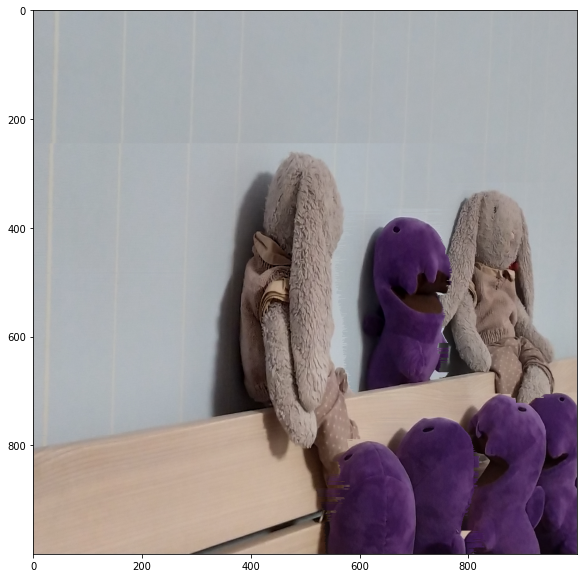

In [4]:
plt.imshow(result)

Дана реалізація дозволяє вам використовувати свої власні функції та задавати власні значення констант, наприклад:

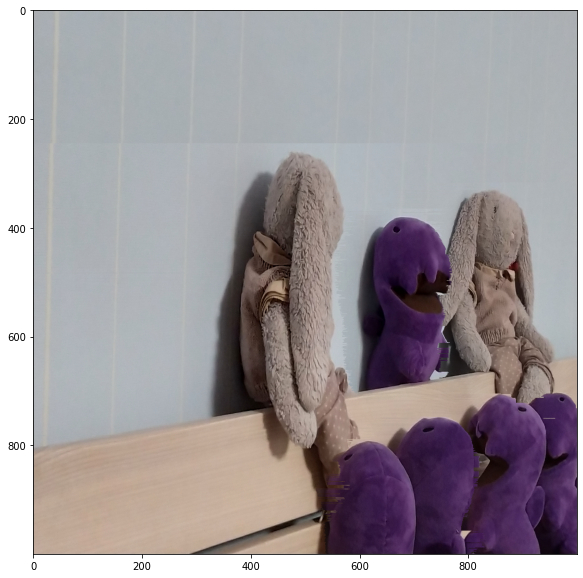

In [5]:
g_extra = partial(g, b=0.1, ord=2)
q_extra = partial(q, a=200)

result_extra = merge(images, masks, g=g_extra, q=q_extra)

plt.imshow(result_extra)

Як бачимо, отримали схоже зображення, але не однакове(переконаємось у цьому)

In [6]:
np.allclose(result_extra, result)

False